<a href="https://colab.research.google.com/github/Khawaritzmi/Mk.-Data-Mining-2021/blob/main/Data_Mining_Pertemuan_5_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Bob Chrismansyah Pata'dungan Kabanga

NIM : H071201087

## Preprocessing Data Tidak Terstruktur

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data Citra

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [6]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester3/DataMining/dellxps17.jpg')

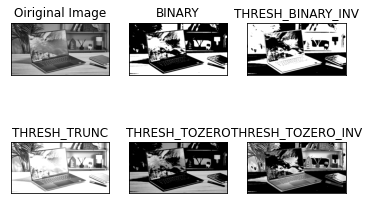

In [7]:
gray_image = cv.imread('/content/drive/MyDrive/Kuliah/Semester3/DataMining/dellxps17.jpg',0)

ret,thresh_binary = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
ret,thresh_binary_inv = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)
ret,thresh_trunc = cv.threshold(gray_image,127,255,cv.THRESH_TRUNC)
ret,thresh_tozero = cv.threshold(gray_image,127,255,cv.THRESH_TOZERO)
ret,thresh_tozero_inv = cv.threshold(gray_image,127,255,cv.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

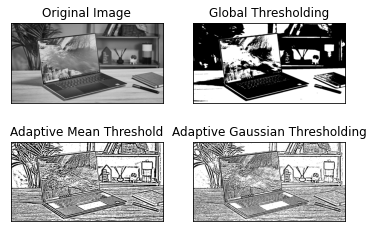

In [8]:
ret,thresh_global = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

thresh_gaussian = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# 2. Data Text


Tokenizer sekarang sudah bisa digunakan dalam bahasa inggris maupun bahasa Indonesia. Tokenization bisa juga disebut sebagai data munging,wrangling dari data text. Secara singkat yaitu mengelompkkan kata-kata

2.1. Tokenisasi dengan library TF

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

Misalnya ada kata alay yang sulit dideteksi oleh mesin maka akan diganti sesuai dengan tokennya itu

In [10]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [11]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [12]:
tokenizer.fit_on_texts(teks)

setelah teksnya dikelompokkan maka teknya dimasukkan kedalam sequences

In [13]:
sequences = tokenizer.texts_to_sequences(teks)

kemudian diprint dalam bentuk dictionary yang setiap kata itu diberikan nilai

In [14]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

angka angkanya hasil dari dictionary

In [16]:
print(sequences_samapanjang)

[[ 0  0  0  3  4  2]
 [ 0  0  0  2  5  6]
 [ 7  8  9 10 11 12]]


Dari sequencenya itu bisa diisi parameter padding, misalnya paddingnya mau di depan atau di belakang, padding itu sendiri adalah pre

Ada juga biasa digunakan maxlen

In [17]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

angka nolnya akan berada di belakang karena untuk menambahkan teks sama pangjang itu ditambahkan setelah kalimat

In [18]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 8  9 10 11 12]]


In [19]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

In [20]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]


2.2. Tokenisasi menggunakan NLTK

In [21]:
# Installing Modules for Google Colab
!pip install unidecode
!pip install pyLDAvis
!pip install textblob
!pip install sastrawi
!pip install twython
!pip install tweepy
!pip install spacy
!pip install python-crfsuite
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm
import nltk
nltk.download('popular')

     |████████████████████████████████| 235 kB 14.2 MB/s 
     |████████████████████████████████| 1.7 MB 15.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 41.0 MB/s 
     |████████████████████████████████| 15.7 MB 193 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=7dd4fdfafbad31e2ccf964c675b13bf2dc8ef53d06c46d19feccef5e2914e4c0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
E

     |████████████████████████████████| 209 kB 14.4 MB/s 
     |████████████████████████████████| 743 kB 15.0 MB/s 
     |████████████████████████████████| 12.0 MB 12.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 3.7 MB 15.7 MB/s 
  Created wheel for xx-ent-wiki-sm: filename=xx_ent_wiki_sm-2.2.0-py3-none-any.whl size=3732134 sha256=468d7db74c06e53325af865ee68dd3938dddc6a99070a814125401b4c647bee1
  Stored in directory: /tmp/pip-ephem-wheel-cache-td5nwpp3/wheels/87/31/20/7f7576bcd0b6ee9c7056c60e28d9e6a40143c553cb5fecc9e2
Successfully built xx-ent-wiki-sm
✔ Download and installation successful
You can now load the model via spacy.load('xx_ent_wiki_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/x

True

In [44]:
T = "Tetap semangat mengerjakan tugas, pelan - pelan tetapi serius dan selesai tepat waktu."
Word_Tokens = nltk.word_tokenize(T)
print(Word_Tokens) # tokenisasi kata

['Tetap', 'semangat', 'mengerjakan', 'tugas', ',', 'pelan', '-', 'pelan', 'tetapi', 'serius', 'dan', 'selesai', 'tepat', 'waktu', '.']


In [45]:
# Bandingkan jika menggunakan fungsi split di Python, apakah bedanya? 
print(T.split())
# Apakah kesimpulan yang bisa kita tarik?

['Tetap', 'semangat', 'mengerjakan', 'tugas,', 'pelan', '-', 'pelan', 'tetapi', 'serius', 'dan', 'selesai', 'tepat', 'waktu.']


In [46]:
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens) # Tokenisasi kalimat
# Perhatikan hasilnya, ada berapa kalimat yang di deteksi? setuju?

['Tetap semangat mengerjakan tugas, pelan - pelan tetapi serius dan selesai tepat waktu.']


untuk print indeks tetapi jika ada simbol (bahasa python di dalamnya misalnya \n maka akan dibaca sebagai enter

In [48]:
T = "tetap semangat\npantang menyerah"
print(T)
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens)

tetap semangat
pantang menyerah
['tetap semangat\npantang menyerah']


2.3. Tokenisasi menggunakan Spacy

In [49]:
# Contoh Tokenisasi dalam bahasa Indonesia dengan Spacy
from spacy.lang.id import Indonesian
nlp_id = Indonesian()  # Language Model

teks = 'Kucing itu sedang tidur. (unsur-unsur kalimat yang ada di dalamnya: S dan P; di mana S kucing itu, dan P: sedang tidur)'
tokenS_id = nlp_id(teks)
#T = []
#for token in tokenS_id:
#    T.append(token)
print([t for t in tokenS_id])

[Kucing, itu, sedang, tidur, ., (, unsur-unsur, kalimat, yang, ada, di, dalamnya, :, S, dan, P, ;, di, mana, S, kucing, itu, ,, dan, P, :, sedang, tidur, )]


In [50]:
# Jika menggunakan Language model English:
from spacy.lang.en import English
nlp_en = English()
tokenS_en = nlp_en(teks)
print([token.text for token in tokenS_en])

['Kucing', 'itu', 'sedang', 'tidur', '.', '(', 'unsur', '-', 'unsur', 'kalimat', 'yang', 'ada', 'di', 'dalamnya', ':', 'S', 'dan', 'P', ';', 'di', 'mana', 'S', 'kucing', 'itu', ',', 'dan', 'P', ':', 'sedang', 'tidur', ')']


# 3. Data Audio


Sinyal audio diubah kedalam citra

Data audio itu terhitung sebagai data sinyal

Cara mengolah data audio yaitu gelombangnya divisualisasikan kedalam bentuk float, dari gambar tersebut diproses lagi menggunakan data citra, hanya awalnya diubah kedalam bentuk citra menggunakan metode tertentu untuk memvisualisasikan gelombang tersebut, karena bentuknya juga bisa dalam bentuk 3 Dimensi, jadi misalnya divisualisasikan dalma segi waktunya dan dalam segi frekuensinya

Salah satu cara yang banyak digunakan orang yaitu menggunakan library dari librosa

import librosa
kemudian masukkan file audionya

kita menggunakan 2 variabel ada x yang merupakan integer dan sr merupakan array (waktu dan frekueni). Frekuensi itu adalah tinggi maksimum dan minimum yang digunakan sebagai acuan

In [28]:
import librosa
audio_data = '/content/drive/MyDrive/Kuliah/Semester3/DataMining/sfx-piano-bar2.mp3'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


In [29]:
librosa.load(audio_data, sr=44100)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

untuk menampilkan audionya agar bisa diputar kita menggunakan library yang berbeda yaitu menggungakan IPythin.display

In [30]:
import IPython.display as ipd
ipd.Audio(audio_data)

Untuk melihat float dari audionya kita bisa menggunakan matlotlib

dari gambarnya kita bisa simpan dan menjadi data citra

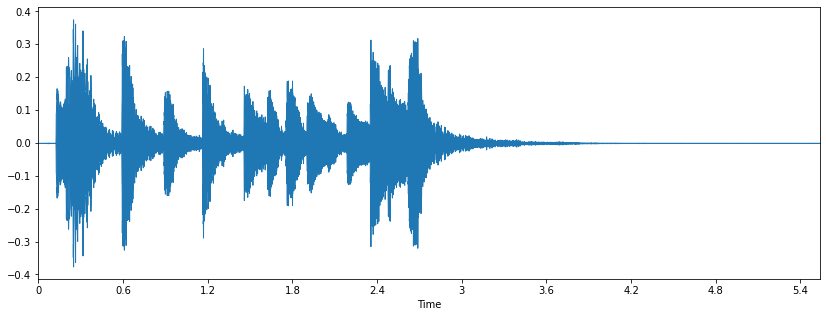

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

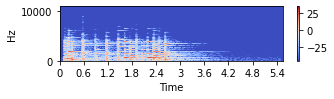

In [32]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 1))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

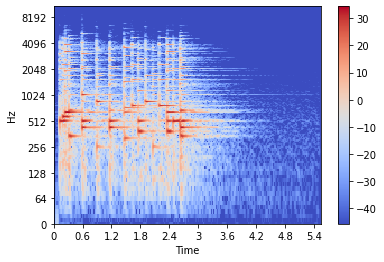

In [33]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Spectral Centroid (SC) mengukur posisi dan bentuk spektral dari titik keseimbangan distribusi energi. Secara sederhana spectral centroid disebut gravitasi dari spektrum.

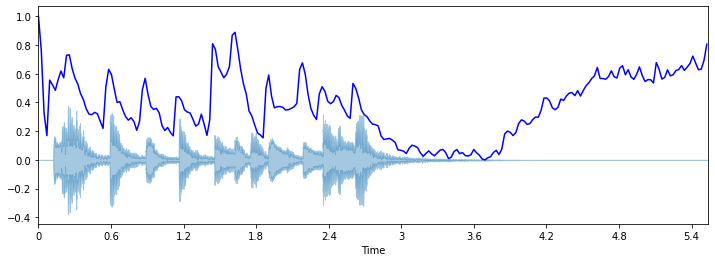

In [34]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Spectral Rolloff (SR) Yaitu menentukan nilai frekuensi yang terletak dibawah nilai distribusi spektrum (biasanya bernilai 90%) terkonsentrasi. C, parameter persentase.

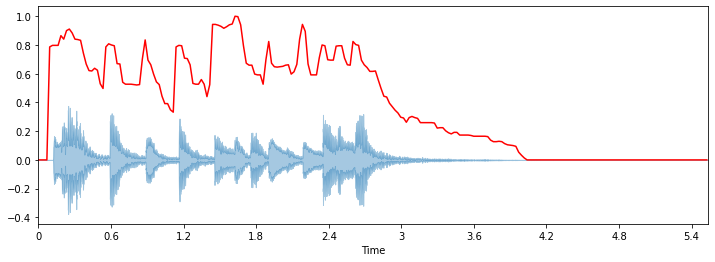

In [35]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

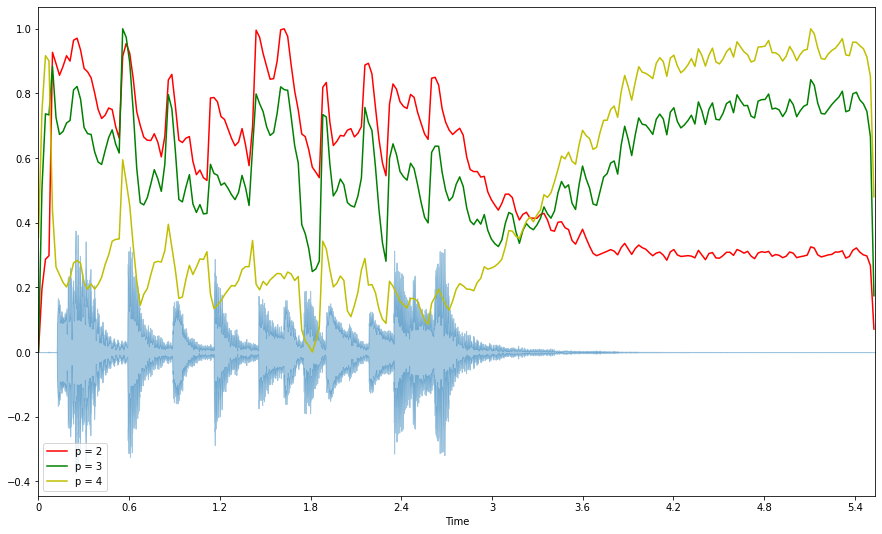

In [36]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

Zero-Crossing Rate

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


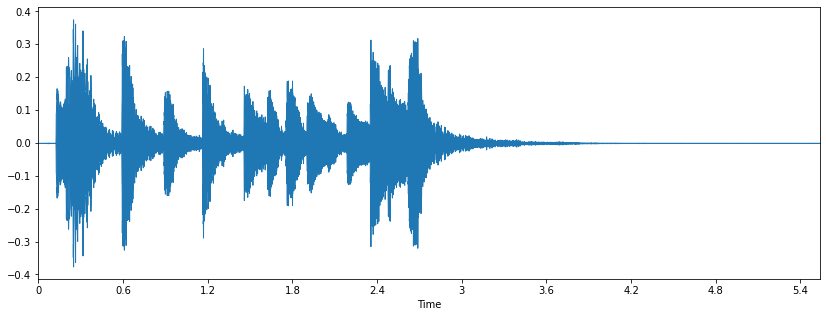

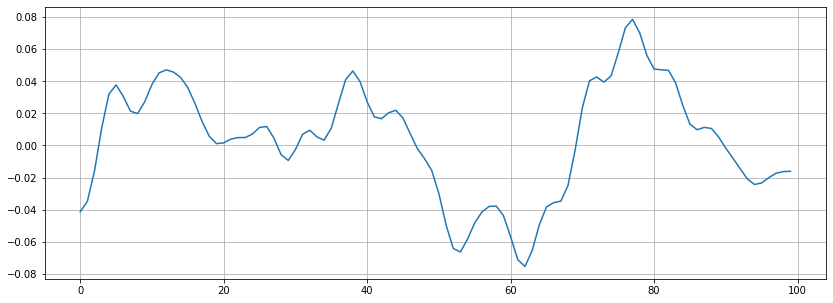

In [37]:
x, sr = librosa.load('/content/drive/MyDrive/Kuliah/Semester3/DataMining/sfx-piano-bar2.mp3')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

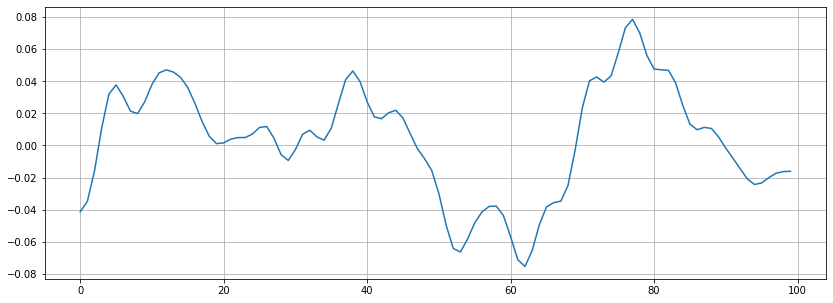

In [38]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [39]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16

6


Mel-Frequency Cepstrum Coefficients (MFCC) adalah salah satu bentuk representasi cepstral dari sinyal dimana frekuensi didistribusi berdasarkan skala mel bukan secara pendekatan linear.